In [ ]:
%%capture
!pip install roboflow

In [ ]:

from roboflow import Roboflow
rf = Roboflow(api_key="DIMiJPktWsGdNtddEtQo")
project = rf.workspace("neoeliotix").project("medicalhandwrittenprescription")
version = project.version(3)
dataset = version.download("yolov8-obb")


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to MedicalHandwrittenPrescription--3 in yolov8-obb:: 100%|██████████| 2482/2482 [00:04<00:00, 614.78it/s]


In [ ]:
%%capture
!pip install ultralytics
from ultralytics import YOLO

## Train yolo model for 100 epoch

In [ ]:
model = YOLO('yolov8n-obb.pt')


results = model.train(
    data="medicalhandwrittenprescription-6/data.yaml",  # Path to the data.yaml file
    epochs=100,  # Maximum number of epochs
    batch=16,  # Batch size
    imgsz=640,  # Image size
    device="0",  # Use GPU (set to "cpu" if no GPU is available)
    name="yolov8n-obb-medical-prescription",  # Name of the training run
    pretrained=True,  # Use a pretrained model
    optimizer="auto",  # Optimizer (auto, SGD, Adam, etc.)
    lr0=0.01,  # Initial learning rate
    lrf=0.01,  # Final learning rate (lr0 * lrf)
    weight_decay=0.0005,  # Weight decay
    save=True,  # Save the best model
    save_period=10,  # Save checkpoints every 10 epochs
    plots=True,  # Generate training plots
    seed=42,  # Random seed for reproducibility
    patience=10,  # Early stopping patience (epochs to wait after last improvement)
    val=True,  # Validate during training
    early_stopping=True  # Enable early stopping
)

100%|██████████| 755k/755k [00:00<00:00, 22.9MB/s]
100%|██████████| 5.35M/5.35M [00:00<00:00, 88.5MB/s]
train: Scanning /content/MedicalHandwrittenPrescription--3/train/labels... 866 images, 2 backgrounds, 0 corrupt: 100%|██████████| 866/866 [00:00<00:00, 1668.19it/s]
train: Scanning /content/MedicalHandwrittenPrescription--3/train/labels.cache... 866 images, 2 backgrounds, 0 corrupt: 100%|██████████| 866/866 [00:00<?, ?it/s]
val: Scanning /content/MedicalHandwrittenPrescription--3/valid/labels... 248 images, 0 backgrounds, 0 corrupt: 100%|██████████| 248/248 [00:00<00:00, 676.43it/s]
      1/100      4.48G      2.501      2.967      3.017         61        640: 100%|██████████| 28/28 [00:59<00:00,  2.14s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:11<00:00,  1.48s/it]
      2/100      4.51G       1.23      1.686      2.525          6        640: 100%|██████████| 28/28 [00:42<00:00,  1.52s/it]
                 C

'\nmodel.train(\n    data="medicalhandwrittenprescription-2/data.yaml",  # Path to the data.yaml file\n    epochs=100,  # Maximum number of epochs\n    batch=16,  # Batch size\n    imgsz=640,  # Image size\n    device="0",  # Use GPU (set to "cpu" if no GPU is available)\n    name="yolov8n-obb-medical-prescription",  # Name of the training run\n    pretrained=True,  # Use a pretrained model\n    optimizer="auto",  # Optimizer (auto, SGD, Adam, etc.)\n    lr0=0.01,  # Initial learning rate\n    lrf=0.01,  # Final learning rate (lr0 * lrf)\n    weight_decay=0.0005,  # Weight decay\n    save=True,  # Save the best model\n    save_period=10,  # Save checkpoints every 10 epochs\n    plots=True,  # Generate training plots\n    seed=42,  # Random seed for reproducibility\n    patience=10,  # Early stopping patience (epochs to wait after last improvement)\n    val=True,  # Validate during training\n    early_stopping=True  # Enable early stopping\n)'

In [ ]:
print(results)

ultralytics.utils.metrics.OBBMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7f01af80fe10>
curves: []
curves_results: []
fitness: np.float64(0.8208487538026914)
keys: ['metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)', 'metrics/mAP50-95(B)']
maps: array([    0.79532,     0.79934,     0.81075,     0.80559])
names: {0: 'Arabic', 1: 'English', 2: 'Frequency', 3: 'Medicine'}
plot: True
results_dict: {'metrics/precision(B)': np.float64(0.977137256091126), 'metrics/recall(B)': np.float64(0.9729952201761874), 'metrics/mAP50(B)': np.float64(0.9837531563262353), 'metrics/mAP50-95(B)': np.float64(0.8027482646334088), 'fitness': np.float64(0.8208487538026914)}
save_dir: PosixPath('runs/obb/train2')
speed: {'preprocess': 0.27018496774461154, 'inference': 2.4485696693582506, 'loss': 0.0003787459762304113, 'postprocess': 7.578889979835103}


In [ ]:
from ultralytics import YOLO

# Load trained model
model = YOLO('runs/obb/train2/weights/best.pt')

# Evaluate on test set
metrics = model.val(
    data='/content/MedicalHandwrittenPrescription-6/data.yaml',
    split='test',  # Force test set evaluation
    batch=16,      # Adjust based on GPU memory
    plots=True     # Generate confusion matrix, PR curves
)

print(metrics.box.map)    # mAP50-95
print(metrics.box.map50)  # mAP50

## Function te get yolo prediction with confidence

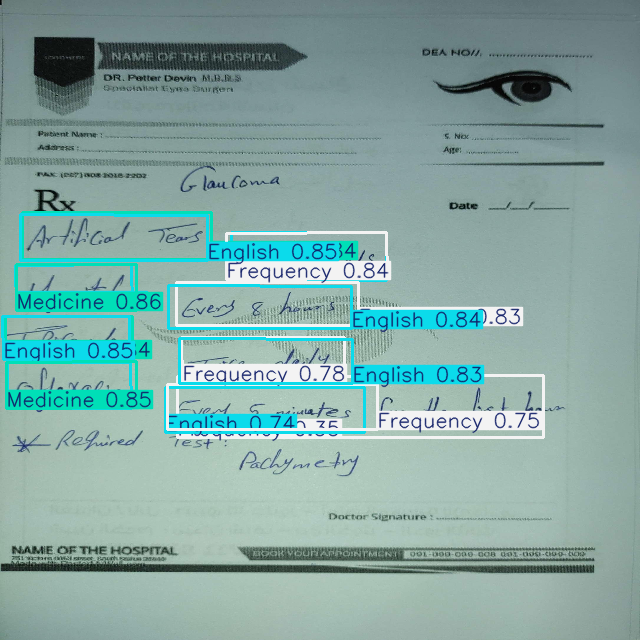

In [ ]:
from ultralytics import YOLO
import cv2


# List of image paths to test
image_paths = [
    "/content/MedicalHandwrittenPrescription--3/test/images/prescription_opth_198_jpg.rf.f0e8a8fdc577cd9d73402879bd071cec.jpg"
]

# Run inference on each image
for image_path in image_paths:
    # Read the image using OpenCV
    img = cv2.imread(image_path)

    # Resize to 640x640 (maintains aspect ratio and pads if needed)
    img_resized = cv2.resize(img, (640, 640), interpolation=cv2.INTER_LINEAR)

    # Run prediction on the resized image
    results = model.predict(img_resized, save=True, conf=0.30)  # conf is the confidence threshold

    # Display results (optional)
    for result in results:
        result.show()  # Show the image with bounding boxes
        result.save(filename=f"result_{image_path.split('/')[-1]}")  # Save the result

## Function te get each box and its label with confidence and posistion

In [ ]:
import numpy as np

# Process results
for result in results:
    # Get detection data
    boxes = result.obb.xyxyxyxy  # Rotated boxes coordinates
    confidences = result.obb.conf  # Confidence scores
    class_ids = result.obb.cls  # Class IDs

    # Print header
    print("\n" + "="*50)
    print(f"Detected {len(boxes)} elements in the prescription:")
    print("="*50)

    # Print each box individually
    for i, (box, conf, cls_id) in enumerate(zip(boxes, confidences, class_ids), 1):
        class_name = result.names[int(cls_id)]
        print(f"\nElement {i}:")
        print(f"  Class: {class_name}")
        print(f"  Confidence: {conf:.2f}")
        print("  Coordinates (4 corner points):")

        # Convert tensor to numpy array and format coordinates
        points = box.cpu().numpy().reshape(4, 2)
        for j, (x, y) in enumerate(points, 1):
            print(f"    Point {j}: ({x:.1f}, {y:.1f})")

        # Calculate and print center position
        center_x = points[:, 0].mean()
        center_y = points[:, 1].mean()
        print(f"  Center position: ({center_x:.1f}, {center_y:.1f})")
        print(f"  Box width: {np.linalg.norm(points[0] - points[1]):.1f} px")
        print(f"  Box height: {np.linalg.norm(points[1] - points[2]):.1f} px")

print("\n" + "="*50)
print("Prescription analysis complete")
print("="*50)


Detected 17 elements in the prescription:

Element 1:
  Class: Frequency
  Confidence: 0.85
  Coordinates (4 corner points):
    Point 1: (254.2, 461.4)
    Point 2: (491.7, 461.1)
    Point 3: (491.7, 418.8)
    Point 4: (254.2, 419.1)
  Center position: (373.0, 440.1)
  Box width: 237.5 px
  Box height: 42.3 px

Element 2:
  Class: Medicine
  Confidence: 0.85
  Coordinates (4 corner points):
    Point 1: (535.9, 505.6)
    Point 2: (536.3, 461.7)
    Point 3: (356.1, 460.3)
    Point 4: (355.8, 504.3)
  Center position: (446.0, 483.0)
  Box width: 44.0 px
  Box height: 180.2 px

Element 3:
  Class: Frequency
  Confidence: 0.84
  Coordinates (4 corner points):
    Point 1: (623.8, 545.3)
    Point 2: (623.9, 502.0)
    Point 3: (479.8, 501.8)
    Point 4: (479.8, 545.1)
  Center position: (551.8, 523.6)
  Box width: 43.3 px
  Box height: 144.0 px

Element 4:
  Class: Frequency
  Confidence: 0.83
  Coordinates (4 corner points):
    Point 1: (338.1, 325.4)
    Point 2: (533.8, 320.2)
